In [172]:
# we need the library json as the reddit data is stored in line-delimited json objects
# (one json object in each line, with each line representing a Reddit comment)
import json

# function to load all comment data into a list of strings
# Input: the path of the file including our data
# Output: a list of strings including the body of the Reddit comments
def load_reddit_comment_data(data_directory):
    comments_data = []  # list object that will store the loaded Reddit comments

    # we first open the file that includes our dataset
    with open(data_directory, 'r', encoding='utf-8') as f:
        # iterate the file, reading it line by line
        for line in f:
            # load the data pertaining to a line into a json object in memory
            data = json.loads(line)

            # check if 'body' key exists and the comment is not removed
            if 'body' in data and data['body'] != "[removed]":
                comments_data.append(data['body'])

    # the method returns all the loaded Reddit comments
    return comments_data

In [173]:
import os
path_to_data = "/Users/Conraad/Documents/20232024-Lokaal/Natural Language Processing/NLP_data/Gaming 2"
json_files = ['mariokart_comments.ndjson', 'mariokart_submissions.ndjson', 'nintendo_comments.ndjson', 'nintendo_submissions.ndjson']
full_paths = [os.path.join(path_to_data, filename) for filename in json_files]
# print(full_paths)

['/Users/Conraad/Documents/20232024-Lokaal/Natural Language Processing/NLP_data/Gaming 2/mariokart_comments.ndjson', '/Users/Conraad/Documents/20232024-Lokaal/Natural Language Processing/NLP_data/Gaming 2/mariokart_submissions.ndjson', '/Users/Conraad/Documents/20232024-Lokaal/Natural Language Processing/NLP_data/Gaming 2/nintendo_comments.ndjson', '/Users/Conraad/Documents/20232024-Lokaal/Natural Language Processing/NLP_data/Gaming 2/nintendo_submissions.ndjson']


In [174]:
mariokart_comments = load_reddit_comment_data(full_paths[0])
mariokart_submissions = load_reddit_comment_data(full_paths[1])
nintendo_comments = load_reddit_comment_data(full_paths[2])
nintendo_submissions = load_reddit_comment_data(full_paths[3])


# print(mariokart_comments[0:10], "\n", 
#       mariokart_submissions[0:10],"\n", 
#       nintendo_comments[0:10],"\n", 
#       nintendo_submissions[0:10])


['Sure buddy. Pro tip: wumao don’t admit it. It defeats the purpose.', "I don't even know what that word is but still, free history lesson. Facts are facts.", "If you look at the mini map the leader didn't get hit by an item, they intentionally slowed down to use the horn on OP", 'Well there I go trying to give people more credit than they deserve. Lol failing at being an ass it is.', "Haha, I appreciate your positivity! Did think there was maybe a chance that the leader accidentally drove off road but you can just about see they didn't from the vid. So definitely some foul play 😄", '“Waaa” x100', 'Ah yes, China’s actual title', 'I always play Pink Gold Peach and I’ll use either the Pipe Frame or Biddybuggy with roller wheels and 9 times out of 10 I’m waxing the floor with Waluigi, Roy, and DK so yeah I’ll stick with my favorite character 🫡', 'that was awesome', "Wow. Is MK8's item thing different than the others or smt? Since you get some wacky combos like this"] 
 [] 
 ["The worlds a

In [175]:
import nltk
import re
import pandas as pd
from nltk.util import ngrams
from collections import Counter, defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
stop_words = set(stopwords.words('english'))
import transformers

# function to preprocess the Reddit comments
# Input: a string that includes a text corresponding to a Reddit comment
# Output: a string with the preprocessed Reddit comment
def preprocess(text):
    text = text.lower()  # convert text to lower-case
    #text = re.sub('&gt;', '', text) # remove some special characters from the data &gt; corresponds to >
    #text = re.sub('&amp;', '', text) # remove some special characters from the data &amp; corresponds to &
    text = re.sub(r'\s+', ' ', text)  # eliminate duplicate whitespaces using regex
    text = re.sub(r'\[[^]]*\]', '', text)  # remove text in square brackets
    text = re.sub(r'http\S+', '', text)  # remove URLs
    #text = re.sub(r'[^a-z0-9\s]', '', text)  # remove punctuation (keep only characters and numbers)
    return text

In [176]:
preprocessed_comments_including_stopwords = [preprocess(comment) for comment in mariokart_comments]
print(preprocessed_comments_including_stopwords[0:10])

['sure buddy. pro tip: wumao don’t admit it. it defeats the purpose.', "i don't even know what that word is but still, free history lesson. facts are facts.", "if you look at the mini map the leader didn't get hit by an item, they intentionally slowed down to use the horn on op", 'well there i go trying to give people more credit than they deserve. lol failing at being an ass it is.', "haha, i appreciate your positivity! did think there was maybe a chance that the leader accidentally drove off road but you can just about see they didn't from the vid. so definitely some foul play 😄", '“waaa” x100', 'ah yes, china’s actual title', 'i always play pink gold peach and i’ll use either the pipe frame or biddybuggy with roller wheels and 9 times out of 10 i’m waxing the floor with waluigi, roy, and dk so yeah i’ll stick with my favorite character 🫡', 'that was awesome', "wow. is mk8's item thing different than the others or smt? since you get some wacky combos like this"]


In [177]:
preprocessed_comments = [] # list holding our dataset (each element corresponds to a preprocessed comment as a string)
for comment in preprocessed_comments_including_stopwords:
    # tokenize the comments and remove stopwords
    filtered_words = [w for w in word_tokenize(comment) if w not in stop_words]
    # join the words back into a sentence
    preprocessed_comments.append(' '.join(filtered_words))
# print(preprocessed_comments[0:10])

['sure buddy . pro tip : wumao ’ admit . defeats purpose .', "n't even know word still , free history lesson . facts facts .", "look mini map leader n't get hit item , intentionally slowed use horn op", 'well go trying give people credit deserve . lol failing ass .', "haha , appreciate positivity ! think maybe chance leader accidentally drove road see n't vid . definitely foul play 😄", '“ waaa ” x100', 'ah yes , china ’ actual title', 'always play pink gold peach ’ use either pipe frame biddybuggy roller wheels 9 times 10 ’ waxing floor waluigi , roy , dk yeah ’ stick favorite character 🫡', 'awesome', "wow . mk8 's item thing different others smt ? since get wacky combos like"]


In [178]:
def get_tracknames_regex() -> list[str]:
    with open('MarioKart_tracks_regex.txt', 'r') as file:
        tracks = [line.strip() for line in file.readlines()]
    return tracks

def get_tracknames():
    with open('MarioKart_tracks.txt', 'r') as file:
        tracks = [line.strip() for line in file.readlines()]
    return tracks

In [179]:
import re

def get_track_mentions(comments: list[str], tracks: list[str]):
    filtered_comments = []

    for comment in comments:
        if any(re.search(track, comment) for track in tracks):
            filtered_comments.append(comment)

    return filtered_comments

In [180]:
tracknames_regex = get_tracknames_regex()
track_comments = get_track_mentions(preprocessed_comments_including_stopwords, tracknames_regex)

In [181]:
tracknames = get_tracknames()

In [182]:
compiled_patterns = [re.compile(pattern, re.IGNORECASE) for pattern in tracknames_regex]

# Initialize an empty dictionary for the final track comments
track_comments_dict = {name: [] for name in tracknames}

# Iterate over each compiled pattern and the corresponding track name from tracknames
for pattern, track_name in zip(compiled_patterns, tracknames):
    # Check each comment to see if it contains the track pattern
    for comment in track_comments:
        if pattern.search(comment):
            track_comments_dict[track_name].append(comment)

In [ ]:
length_dict = {key: len(value) for key, value in track_comments_dict.items()}

In [184]:
difficult_synonyms = ["difficult",
    "challenging", "tough", "hard", "tricky", "demanding",
    "complicated", "problematic", "troublesome", "onerous",
    "laborious", "formidable", "grueling", "punishing",
    "rigorous", "exhausting", "impossible"
]

easy_synonyms = ["easy",
    "simple", "straightforward", "effortless", "painless", "uncomplicated",
    "easy-peasy", "trivial", "basic", "a breeze", "a cinch",
    "a snap", "clear-cut", "no sweat", "user-friendly", "manageable", "child's play"
]


In [185]:
import spacy

nlp = spacy.load("en_core_web_sm")

def classify_text_with_negation(comment, easy_synonyms, difficult_synonyms):
    doc = nlp(comment)
    is_easy, is_difficult = False, False

    for token in doc:
        if token.text in difficult_synonyms:
            # Check if there's a negation modifier among the token's ancestors
            if any(ancestor.dep_ == 'neg' for ancestor in token.ancestors):
                is_easy = True
            else:
                is_difficult = True
        elif token.text in easy_synonyms:
            if any(ancestor.dep_ == 'neg' for ancestor in token.ancestors):
                is_difficult = True
            else:
                is_easy = True

    if is_easy and not is_difficult:
        return "Easy"
    elif is_difficult and not is_easy:
        return "Difficult"
    else:
        return "Neutral or Mixed"



In [186]:
track_difficulty_counts_spacy = {}

for track, comments in track_comments_dict.items():
    easy_count = 0
    difficult_count = 0
    neutral_count = 0

    for comment in comments:
        if classify_text_with_negation(comment, easy_synonyms, difficult_synonyms) == "Easy":
            easy_count += 1
        elif classify_text_with_negation(comment, easy_synonyms, difficult_synonyms) == "Difficult":
            difficult_count += 1
        else:
            neutral_count += 1

    track_difficulty_counts_spacy[track] = (easy_count, neutral_count, difficult_count)
    print(f'Finished Track: {track}')


Finished Track: ﻿SNES Mario Circuit 3
Finished Track: SNES Bowser Castle 3
Finished Track: SNES Donut Plains 3
Finished Track: Rainbow Road (all)
Finished Track: N64 Kalimari Desert
Finished Track: N64 Toad's Turnpike
Finished Track: N64 Choco Mountain
Finished Track: N64 Royal Raceway
Finished Track: N64 Yoshi Valley
Finished Track: GBA Riverside Park
Finished Track: GBA Mario Circuit
Finished Track: GBA Boo Lake
Finished Track: GBA Cheese Land
Finished Track: GBA Sky Garden
Finished Track: GBA Sunset Wilds
Finished Track: GBA Snow Land
Finished Track: GBA Ribbon Road
Finished Track: GCN Baby Park
Finished Track: GCN Dry Dry Desert
Finished Track: GCN Daisy Cruiser
Finished Track: GCN Waluigi Stadium
Finished Track: GCN Sherbet Land
Finished Track: GCN Yoshi Circuit
Finished Track: GCN DK Mountain
Finished Track: DS Cheep Cheep Beach
Finished Track: DS Waluigi Pinball
Finished Track: DS Shroom Ridge
Finished Track: DS Tick-Tock Clock
Finished Track: DS Mario Circuit
Finished Track: DS

In [187]:
df = pd.DataFrame.from_dict(track_difficulty_counts_spacy, orient= 'index', columns=["Easy", "Neutral", "Difficult"])
df['total'] = df.sum(axis=1)
save_path = "/Users/Conraad/Documents/20232024-Lokaal/Natural Language Processing/Resultaten/3"
# print(df.sort_values(by=['total'], ascending=False))
df.to_csv(save_path + "/dataframe_3.csv")

                      Easy  Neutral  Difficult  total
Rainbow Road (all)      74     3147        121   3342
Dolphin Shoals         365     2721         76   3162
GBA Mario Circuit       72     1173         40   1285
DS Mario Circuit        72     1173         40   1285
Mario Circuit           72     1173         40   1285
...                    ...      ...        ...    ...
Tour Athens Dash         0       13          1     14
Tour Rome Avanti         0        2          0      2
Squeaky Clean Sprint     0        1          0      1
Piranha Plant Cove       0        0          0      0
Tour Madrid Drive        0        0          0      0

[92 rows x 4 columns]


In [188]:
import matplotlib.pyplot as plt

def plot_response(df, min_comments=10, num_bars=10):
    df_sort = df[df['total'] > min_comments].sort_values(by='total', ascending=False)
    df_sort = df_sort.head(num_bars)
    

    fig, ax = plt.subplots()
    df_sort[['Easy', 'Neutral', 'Difficult']].plot(kind='bar', stacked=True, ax=ax)
    ax.set_title('Top 10 Most Mentioned Mario Kart Tracks')
    ax.set_xlabel('Track')
    ax.set_ylabel('Number of Reviews')
    plt.xticks(rotation=45, ha='right')
    plt.show()

def plot_percantage_difficulty(df, min_comments=10, num_bars=10):
    df["dif_percentage"] = df["Difficult"] / df["total"] * 100
    df_sort = df[df['total'] > min_comments].sort_values(by='dif_percentage', ascending=False).head(num_bars)

    fig, ax = plt.subplots()
    df_sort['dif_percentage'].plot(kind='bar', ax=ax)
    ax.set_title('Percentage found as difficult')
    ax.set_xlabel('Track')
    ax.set_ylabel('Percentage of Reviews')
    plt.xticks(rotation=45, ha='right')
    plt.show()


def plot_percantage_easy(df, min_comments=10, num_bars=10):
    df["easy_percentage"] = df["Easy"] / df["total"] * 100
    df_sort = df[df['total'] > min_comments].sort_values(by='easy_percentage', ascending=False).head(num_bars)

    fig, ax = plt.subplots()
    df_sort['easy_percentage'].plot(kind='bar', ax=ax)
    ax.set_title('Percentage found as easy')
    ax.set_xlabel('Track')
    ax.set_ylabel('Percantage of Reviews')
    plt.xticks(rotation=45, ha='right')
    plt.show()

def plot_num_difficult_reviews(df, min_comments=10, num_bars=10):
    df_sort = df[df['total'] > min_comments].sort_values(by='Difficult', ascending=False)
    df_sort = df_sort.head(num_bars)

    fig, ax = plt.subplots()
    df_sort['Difficult'].plot(kind='bar', ax=ax)
    ax.set_title('Number of reviews found as difficult')
    ax.set_xlabel('Track')
    ax.set_ylabel('Number of Reviews')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
def plot_num_easy_reviews(df, min_comments=10, num_bars=10):
    df_sort = df[df['total'] > min_comments].sort_values(by='Easy', ascending=False)
    df_sort = df_sort.head(num_bars)

    fig, ax = plt.subplots()
    df_sort['Easy'].plot(kind='bar', ax=ax)
    ax.set_title('Number of reviews found as easy')
    ax.set_xlabel('Track')
    ax.set_ylabel('Number of Reviews')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    

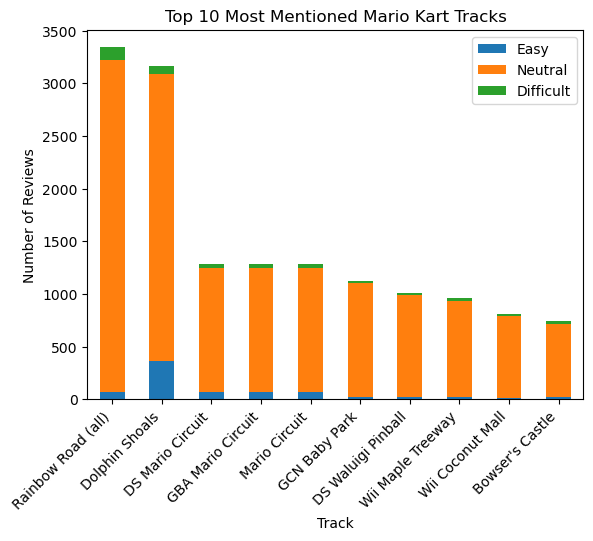

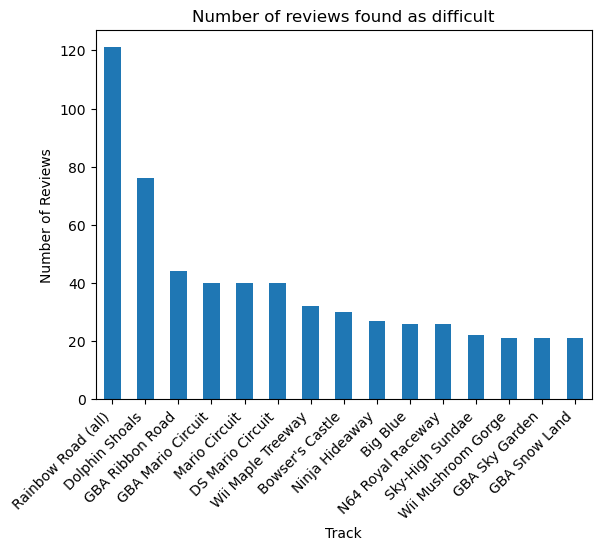

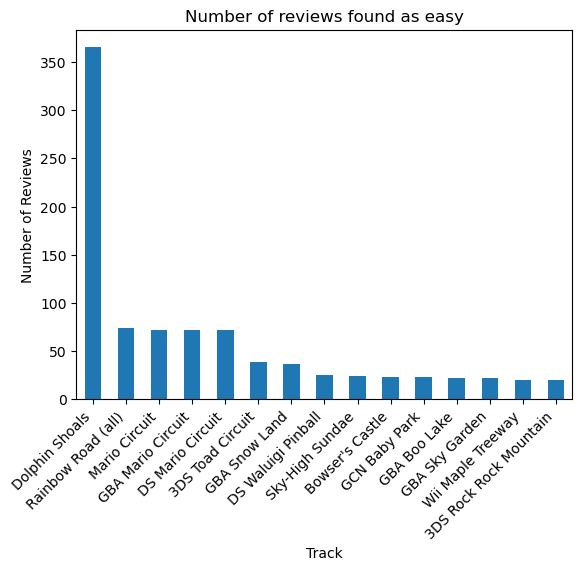

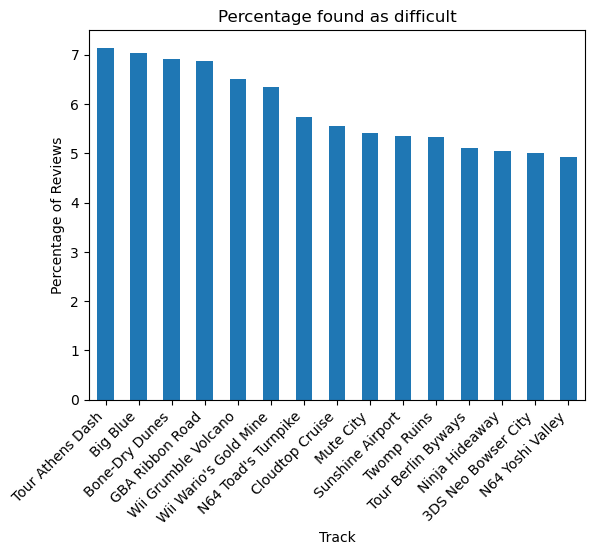

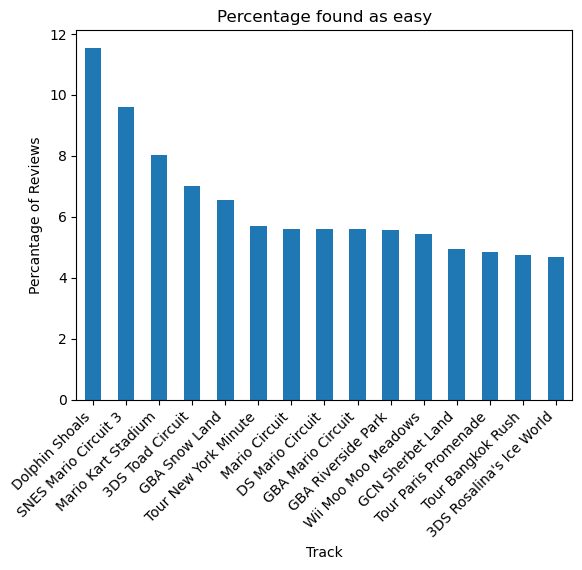

In [189]:
plot_response(df, min_comments=10, num_bars=10)
plot_num_difficult_reviews(df, min_comments=10, num_bars=15)
plot_num_easy_reviews(df, min_comments=10, num_bars=15)
plot_percantage_difficulty(df, min_comments=10, num_bars=15)
plot_percantage_easy(df, min_comments=10, num_bars=15)